This is

In [86]:
import pandas as pd
import matplotlib.pyplot as plt



In [87]:
traffic_df = pd.read_csv('https://raw.githubusercontent.com/sachigill/dhfinalproject/main/traffic_accident_data.csv')

In [105]:
#traffic_df['date'] = pd.to_datetime(accidents['date'])
#traffic_df = traffic_df.dropna()
# Descriptive statistics
#descriptive_stats = traffic_df.describe()
#print(descriptive_stats)

#severity = traffic_df['Severity'].describe()
#temperature = traffic_df['Temperature(F)'].describe()
#precipitation = traffic_df['Precipitation(in)'].describe()

#print("Severity Stats:\n", severity)
#print("Temperature Stats:\n", temperature)
#print("Precipitation Stats:\n", precipitation)
pd.set_option('display.max_columns', None)
print(traffic_df.head())



traffic_df['Wind_Speed(mph)'] = pd.to_numeric(traffic_df['Wind_Speed(mph)'], errors='coerce')
traffic_df['Precipitation(in)'] = pd.to_numeric(traffic_df['Precipitation(in)'], errors='coerce')
traffic_df['Temperature(F)'] = pd.to_numeric(traffic_df['Temperature(F)'], errors='coerce')
traffic_df['Humidity(%)'] = pd.to_numeric(traffic_df['Humidity(%)'], errors='coerce')
traffic_df['Visibility(mi)'] = pd.to_numeric(traffic_df['Visibility(mi)'], errors='coerce')
descriptive_stats = traffic_df[['Severity', 'Wind_Speed(mph)', 'Precipitation(in)', 'Temperature(F)', 'Humidity(%)', 'Visibility(mi)']].describe()

descriptive_stats

          ID   Source  Severity           Start_Time             End_Time  \
0  A-2047758  Source2         2  2019-06-12 10:10:56  2019-06-12 10:55:58   
1  A-4694324  Source1         2  2022-12-03 23:37:14   2022-12-04 1:56:53   
2  A-5006183  Source1         2  2022-08-20 13:13:00  2022-08-20 15:22:45   
3  A-4237356  Source1         2  2022-02-21 17:43:04  2022-02-21 19:43:23   
4  A-6690583  Source1         2   2020-12-04 1:46:00   2020-12-04 4:13:09   

   Start_Lat   Start_Lng    End_Lat     End_Lng  Distance(mi)  \
0  30.641211  -91.153481        NaN         NaN         0.000   
1  38.990562  -77.399070  38.990037  -77.398282         0.056   
2  34.661189 -120.492822  34.661189 -120.492442         0.022   
3  43.680592  -92.993317  43.680574  -92.972223         1.054   
4  35.395484 -118.985176  35.395476 -118.985995         0.046   

                                         Description           Street  \
0  Accident on LA-19 Baker-Zachary Hwy at Lower Z...       Highway 19   


,Severity,Wind_Speed(mph),Precipitation(in),Temperature(F),Humidity(%),Visibility(mi)
count,1499.000000,1391.000000,1027.000000,1474.000000,1471.000000,1468.000000
mean,2.210140,7.721783,0.007653,62.030122,65.186268,9.134475
std,0.485302,5.341519,0.058991,18.640740,22.755323,2.500550
min,1.000000,0.000000,0.000000,-35.000000,6.000000,0.000000
25%,2.000000,4.600000,0.000000,50.000000,48.000000,10.000000
50%,2.000000,7.000000,0.000000,64.000000,67.000000,10.000000
75%,2.000000,10.400000,0.000000,76.000000,85.000000,10.000000
max,4.000000,32.200000,1.360000,111.000000,100.000000,45.000000


In [99]:
weather_condition = traffic_df['Weather_Condition'].dropna().unique()
print("Weather Conditions:", weather_condition)


print("Number of Unique Weather Conditions:", len(weather_condition))

Weather Conditions: ['Fair' 'Wintry Mix' 'Light Rain' 'Cloudy' 'Mostly Cloudy' 'Partly Cloudy'
 'Clear' 'Scattered Clouds' 'Fog' 'Overcast' 'Light Snow' 'T-Storm'
 'Thunderstorms and Rain' 'Thunder' 'Light Rain with Thunder' 'Rain'
 'Showers in the Vicinity' 'Mostly Cloudy / Windy' 'Heavy Rain'
 'Cloudy / Windy' 'Light Drizzle' 'Heavy T-Storm' 'Light Rain / Windy'
 'Smoke' 'Haze' 'Blowing Dust / Windy' 'N/A Precipitation'
 'Thunder in the Vicinity' 'Snow' 'Heavy Thunderstorms and Rain'
 'Shallow Fog' 'Light Freezing Drizzle' 'Fair / Windy' 'Patches of Fog'
 'Light Snow / Windy' 'Blowing Snow / Windy' 'Thunderstorm' 'Drizzle'
 'T-Storm / Windy' 'Partly Cloudy / Windy']
Number of Unique Weather Conditions: 40


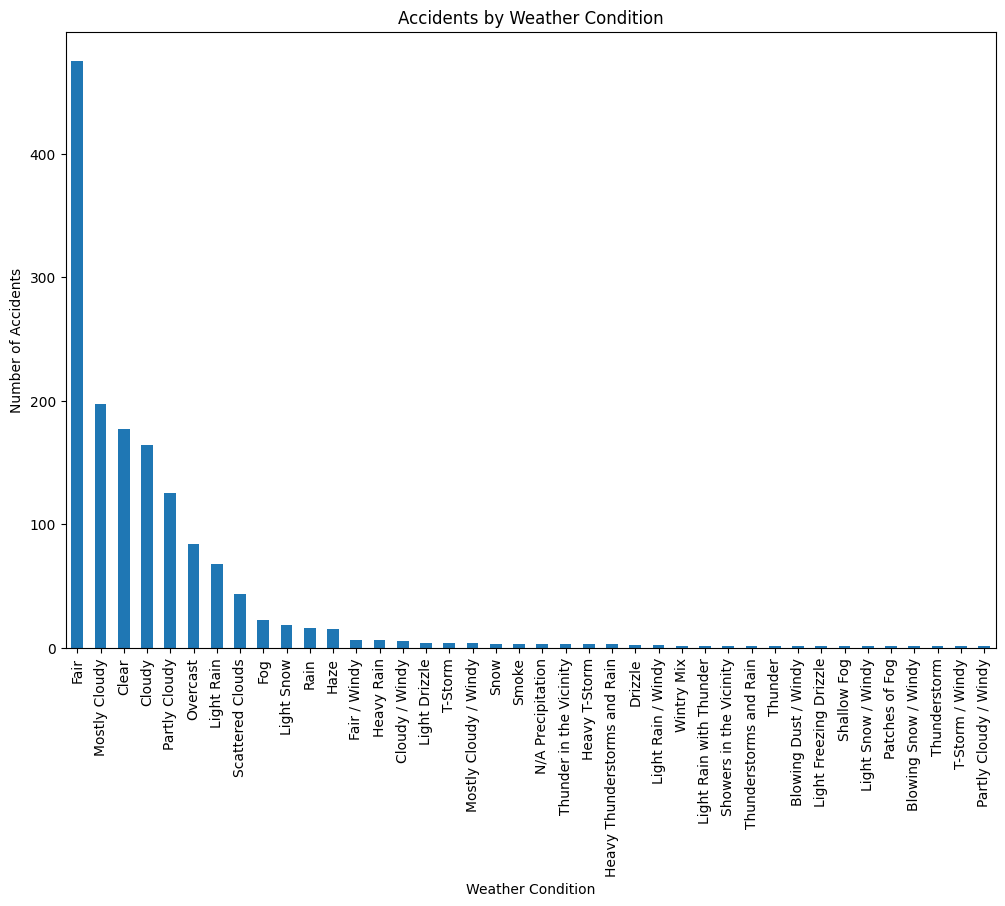

In [4]:
plt.figure(figsize=(12, 8))
traffic_df['Weather_Condition'].value_counts().plot(kind='bar')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Weather Condition')
plt.show()

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


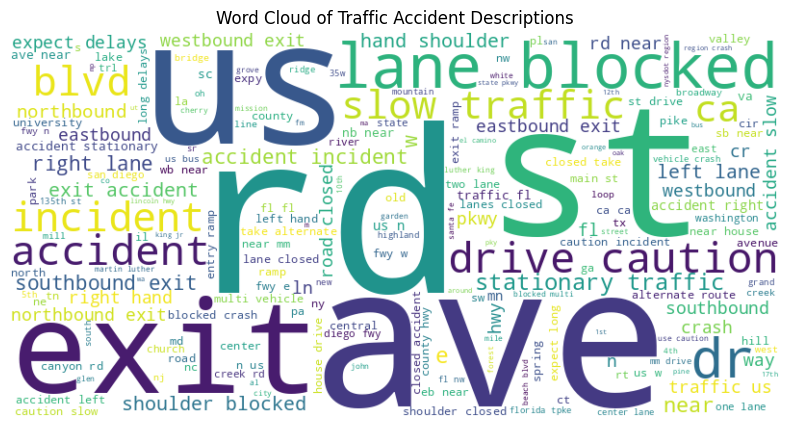

In [114]:
from wordcloud import WordCloud
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

custom_stop_words = {'due', 'accident', 'ca'}
stop_words.update(custom_stop_words)

traffic_df['Description'] = traffic_df['Description'].astype(str)

def text_process(description, stop_words):
  description = description.lower()
  #description = re.sub(r'\d+', '', description)
  #description = re.sub(r'[^\w\s]', '', description)
  words = description.split()
    # Remove stop words
  words_no_stop = [w for w in words if w not in stop_words]
    # Join words back into a single string
  return ' '.join(words_no_stop)

traffic_df['description_final'] = traffic_df['Description'].apply(lambda x: text_process(x, stop_words))

# Combine all descriptions into a single string
all_descriptions = ' '.join(traffic_df['description_final'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_descriptions)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Traffic Accident Descriptions')
plt.show()

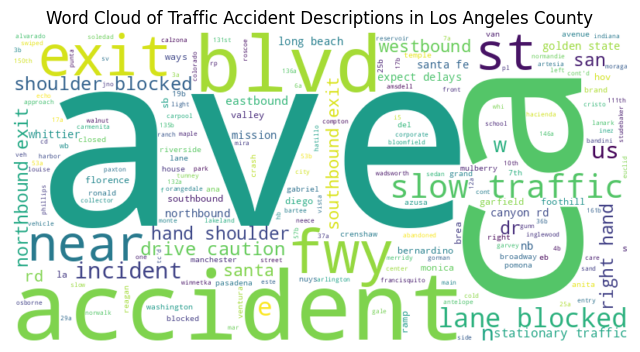

In [111]:
county = 'Los Angeles'
traffic_df_location = traffic_df[traffic_df['County'] == county]


traffic_df['description_final'] = traffic_df['Description'].apply(lambda x: text_process(x, stop_words))

all_descriptions_location = ' '.join(traffic_df_location['description_final'])


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_descriptions_location)


plt.figure(figsize=(8, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Common words in Traffic Accident Descriptions in Los Angeles County')
plt.show()


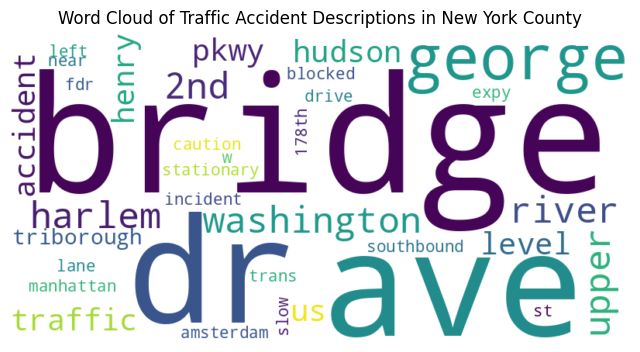

In [112]:
county = 'New York'
traffic_df_location = traffic_df[traffic_df['County'] == county]


traffic_df['description_final'] = traffic_df['Description'].apply(lambda x: text_process(x, stop_words))



all_descriptions_location = ' '.join(traffic_df_location['description_final'])


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_descriptions_location)


plt.figure(figsize=(8, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Common words in Traffic Accident Descriptions in New York County')
plt.show()


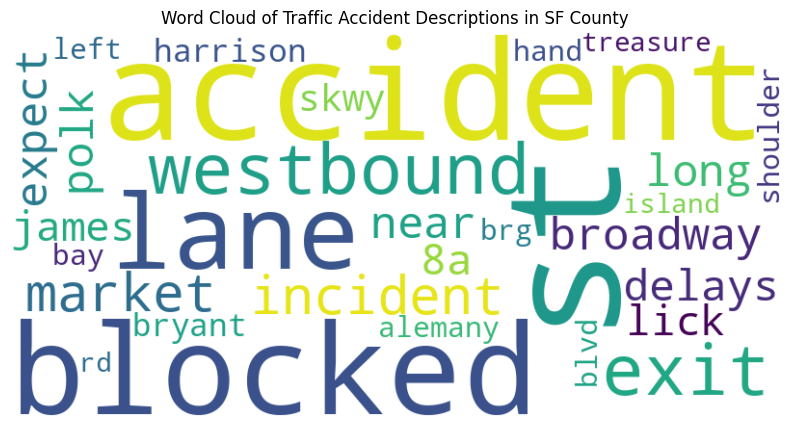

In [65]:
county = 'San Francisco'
traffic_df_location = traffic_df[traffic_df['County'] == county]


traffic_df['description_final'] = traffic_df['Description'].apply(lambda x: text_process(x, stop_words))



all_descriptions_location = ' '.join(traffic_df_location['description_final'])


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_descriptions_location)


plt.figure(figsize=(18, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Common words in Traffic Accident Descriptions in SF County')
plt.show()

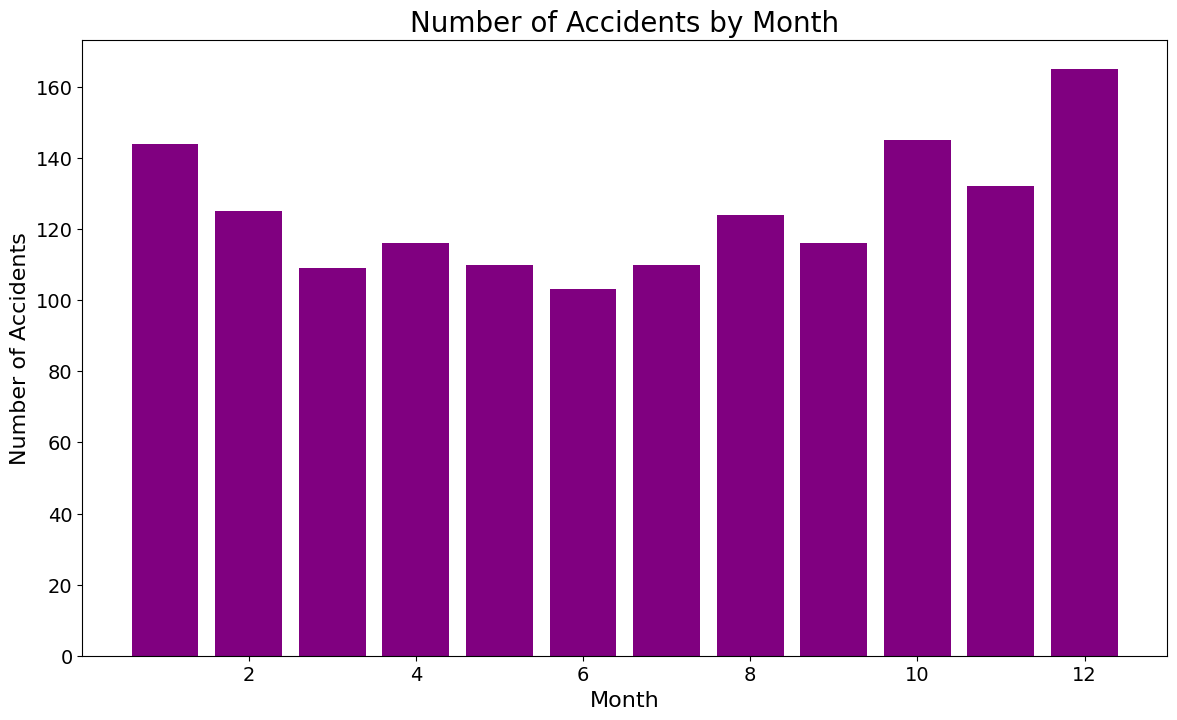

In [119]:
traffic_df['Start_Time'] = pd.to_datetime(traffic_df['Start_Time'], errors='coerce')


traffic_df = traffic_df.dropna(subset=['Start_Time'])
traffic_df['Month'] = traffic_df['Start_Time'].dt.month

#grouping by month and count the number of accidents
accident_per_month = traffic_df.groupby('Month').size().reset_index(name='Number_of_Accidents')



# Sort the DataFrame by month for proper order in the plot
accident_per_month = accident_per_month.sort_values('Month')


plt.figure(figsize=(14, 8))
plt.bar(accident_per_month['Month'], accident_per_month['Number_of_Accidents'], color='purple')
plt.xlabel('Month', fontsize=16)
plt.ylabel('Number of Accidents', fontsize=16)
plt.title('Number of Accidents by Month', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

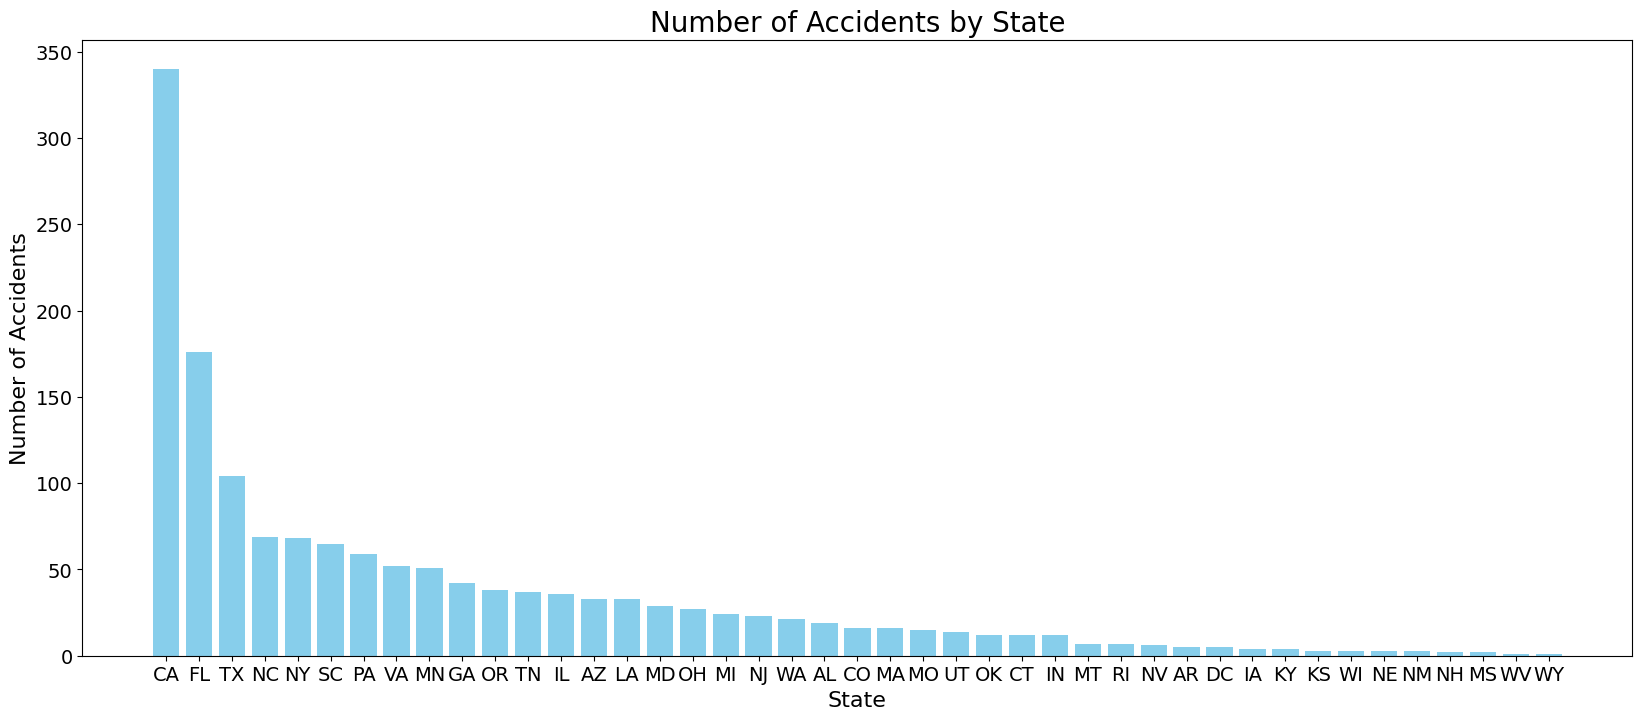

In [123]:
accident_per_state = traffic_df.groupby('State').size().reset_index(name='Number_of_Accidents')


accident_per_state = accident_per_state.sort_values('Number_of_Accidents', ascending=False)


plt.figure(figsize=(20, 8))
plt.bar(accident_per_state['State'], accident_per_state['Number_of_Accidents'], color='skyblue')
plt.xlabel('State', fontsize=16)
plt.ylabel('Number of Accidents', fontsize=16)
plt.title('Number of Accidents by State', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

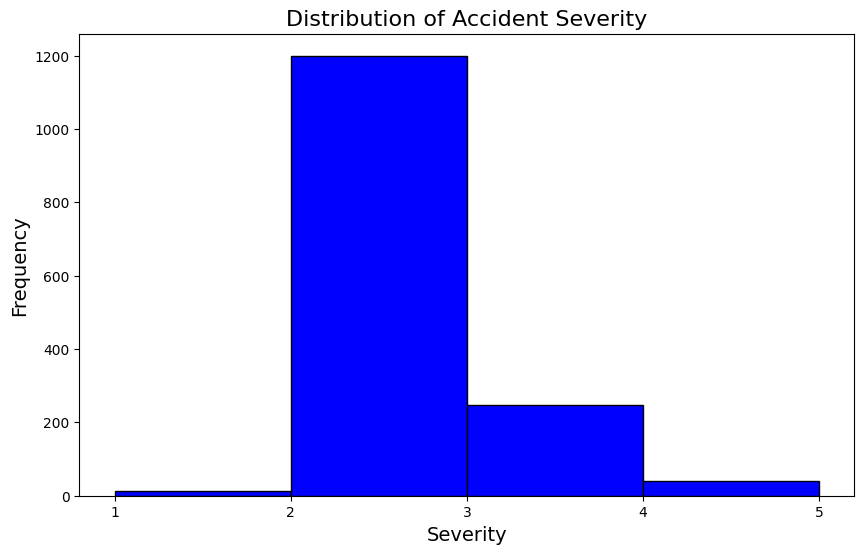

In [124]:
plt.figure(figsize=(10, 6))
plt.hist(traffic_df['Severity'], bins=range(1, 6), edgecolor='black', color='blue')
plt.xlabel('Severity', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Accident Severity', fontsize=16)
plt.xticks(range(1, 6))
plt.show()

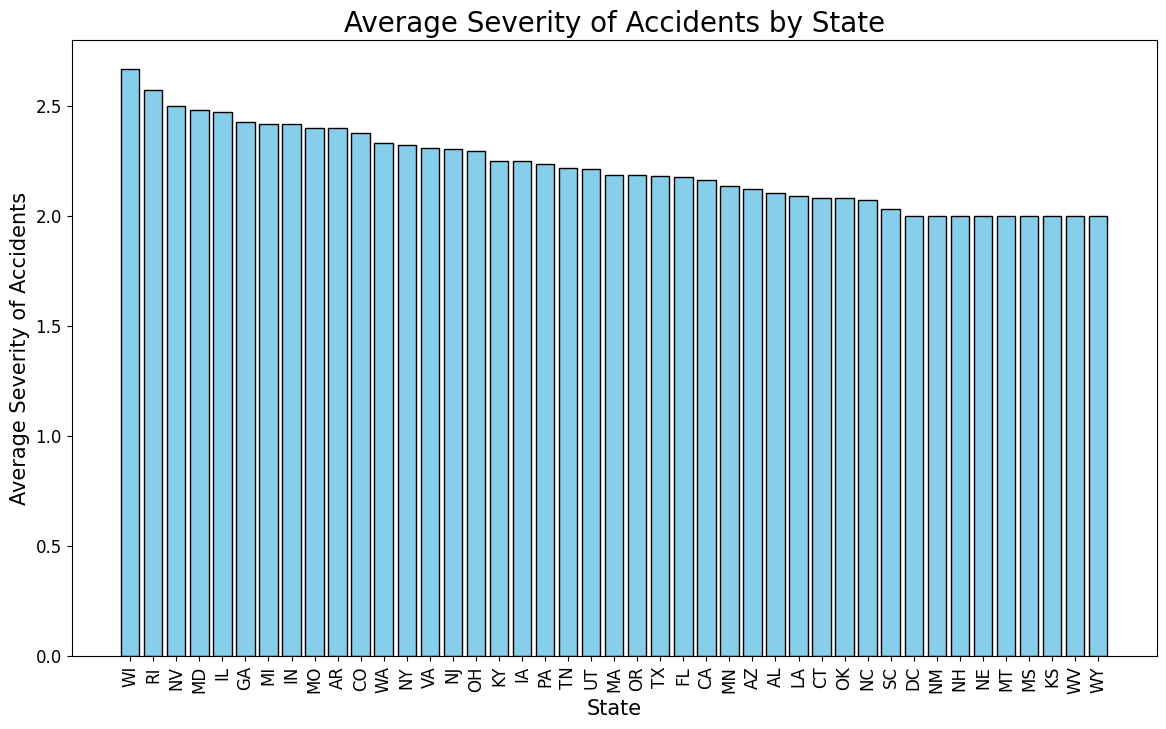

In [94]:
severity_by_state = traffic_df.groupby('State')['Severity'].mean().reset_index()

# Sort by severity for better visualization
severity_by_state = severity_by_state.sort_values(by='Severity', ascending=False)

# Plot the bar chart
plt.figure(figsize=(14, 8))
plt.bar(severity_by_state['State'], severity_by_state['Severity'], color='skyblue', edgecolor='black')
plt.xlabel('State', fontsize=15)
plt.ylabel('Average Severity of Accidents', fontsize=15)
plt.title('Average Severity of Accidents by State', fontsize=20)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

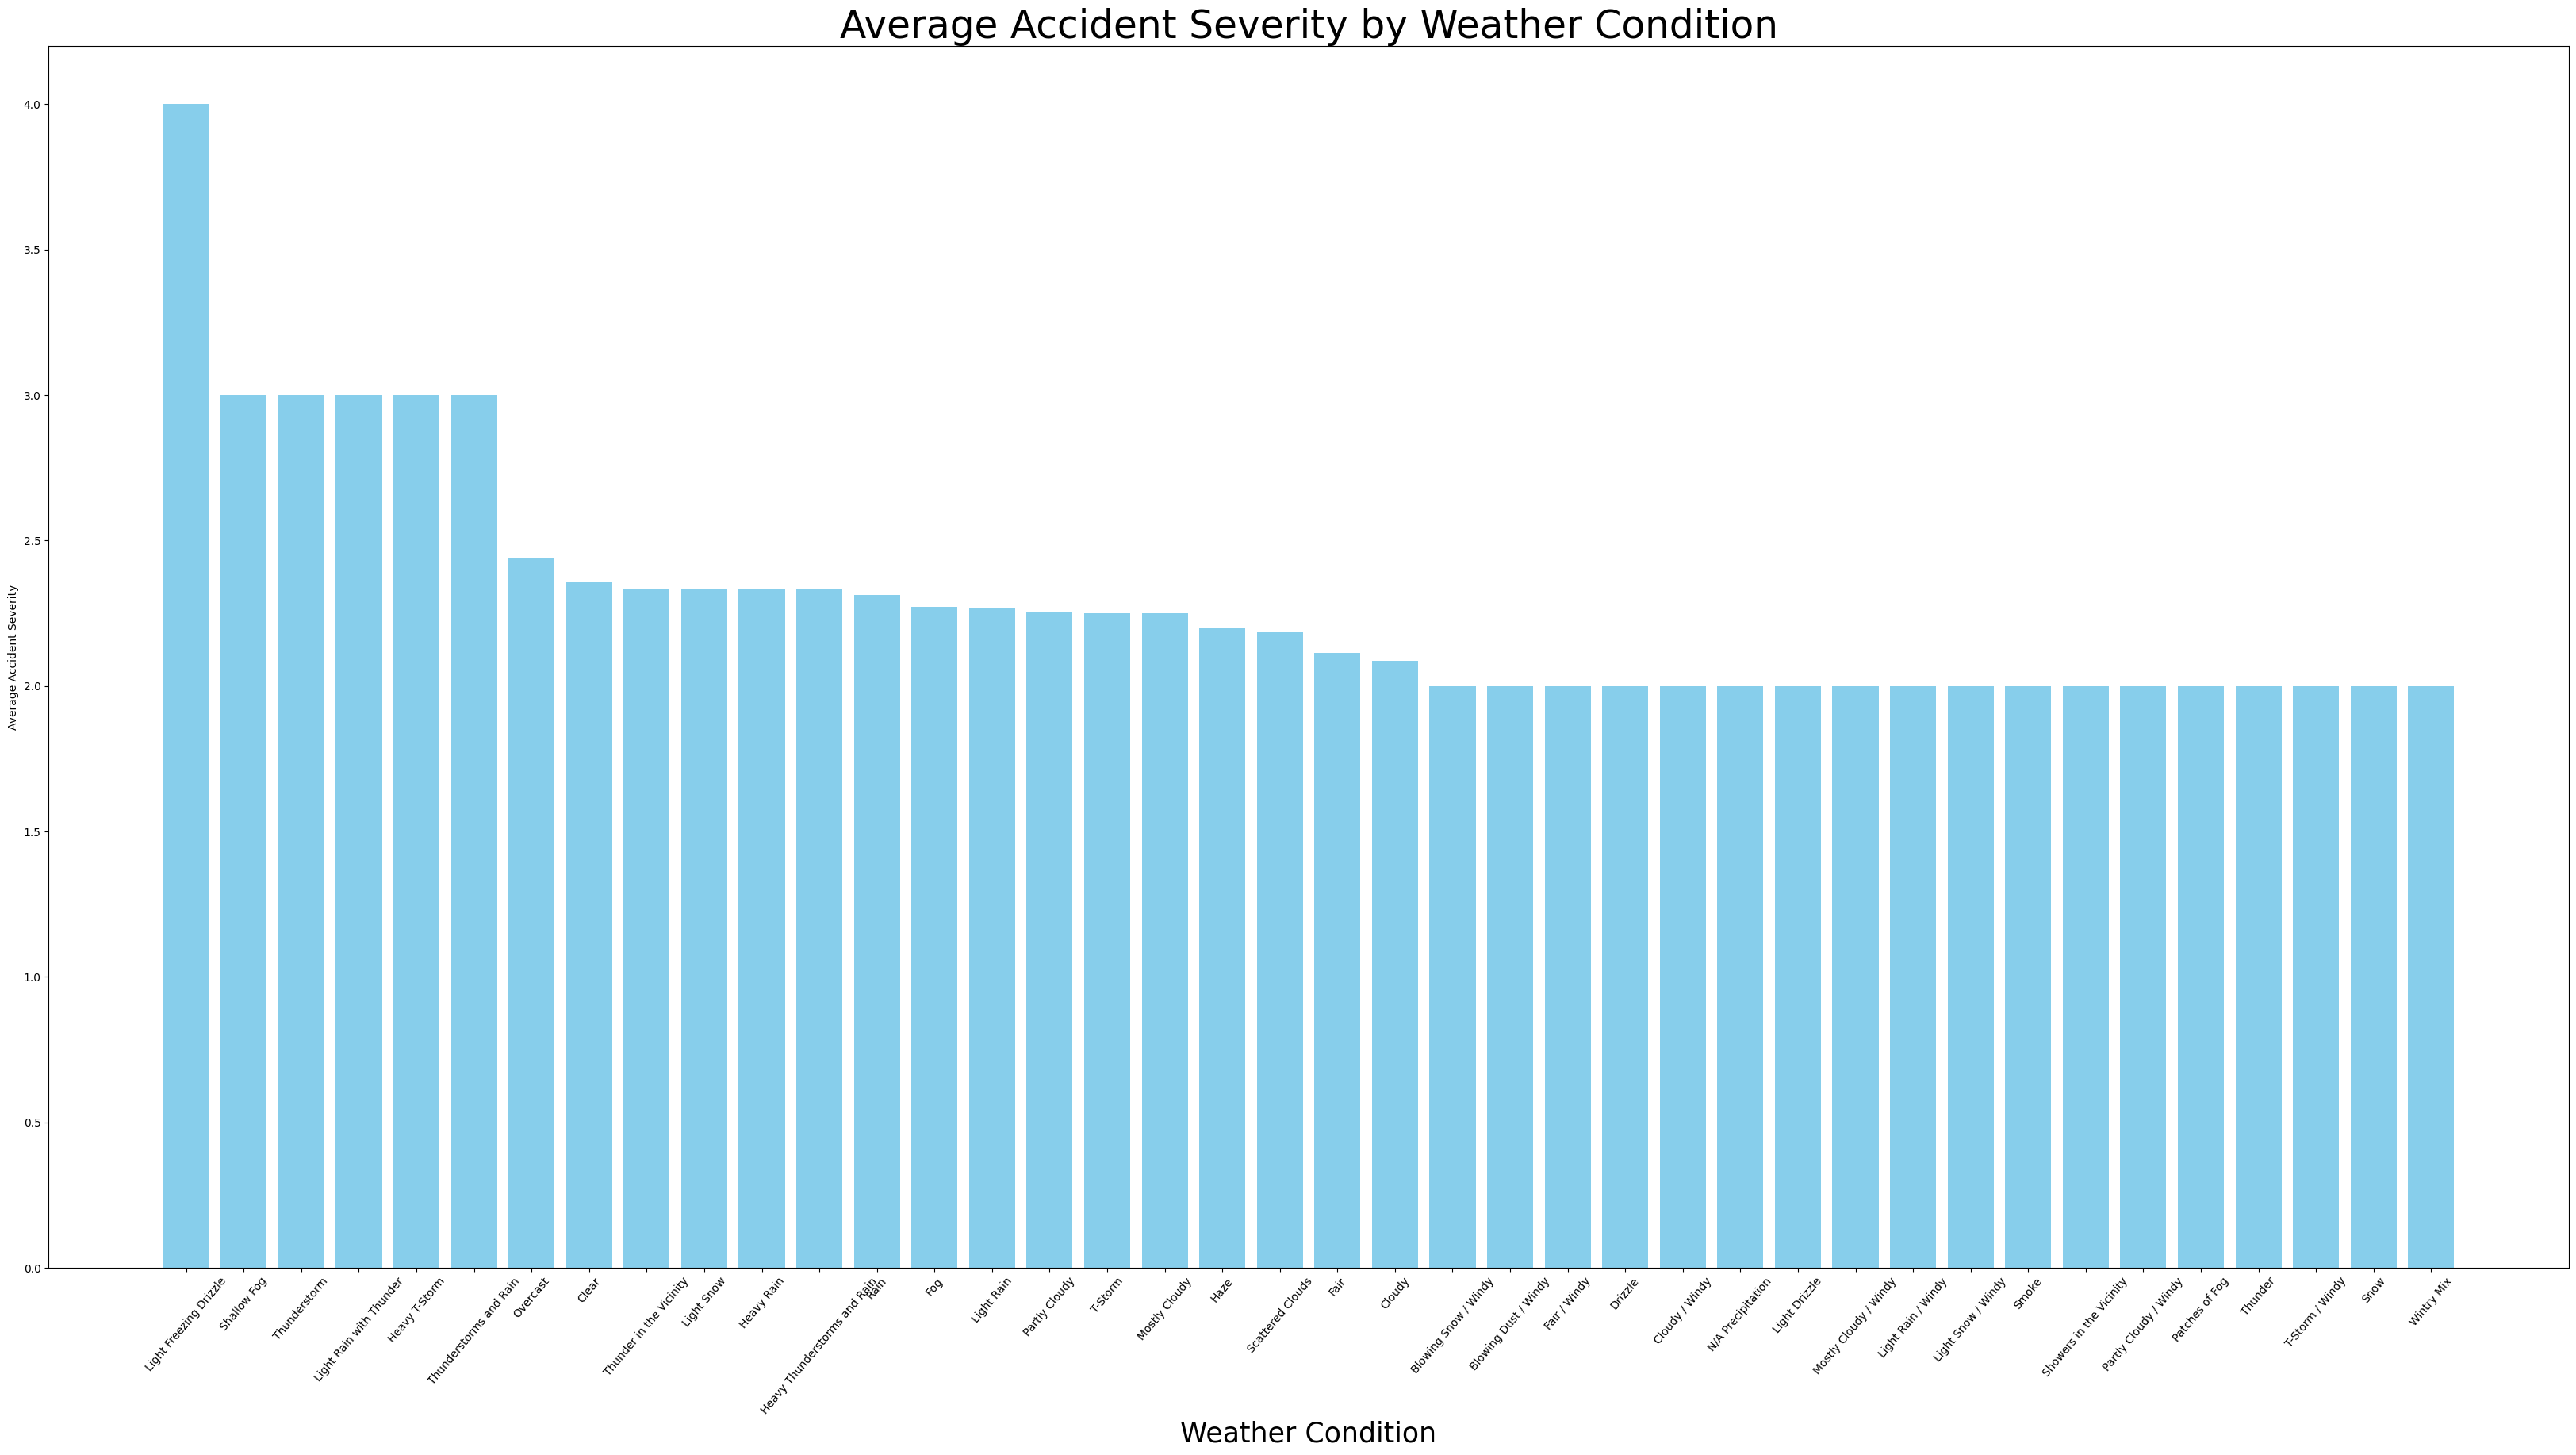

In [126]:
avg_severity_by_weather = traffic_df.groupby('Weather_Condition')['Severity'].mean().reset_index()
avg_severity_by_weather = avg_severity_by_weather.sort_values(by='Severity', ascending=False)

# Bar plot for average severity by weather condition
plt.figure(figsize=(41, 20))
plt.bar(avg_severity_by_weather['Weather_Condition'], avg_severity_by_weather['Severity'], color='skyblue')
plt.xlabel('Weather Condition', fontsize = 25)
plt.ylabel('Average Accident Severity')
plt.title('Average Accident Severity by Weather Condition', fontsize=35)
plt.xticks(rotation=50)
plt.show()

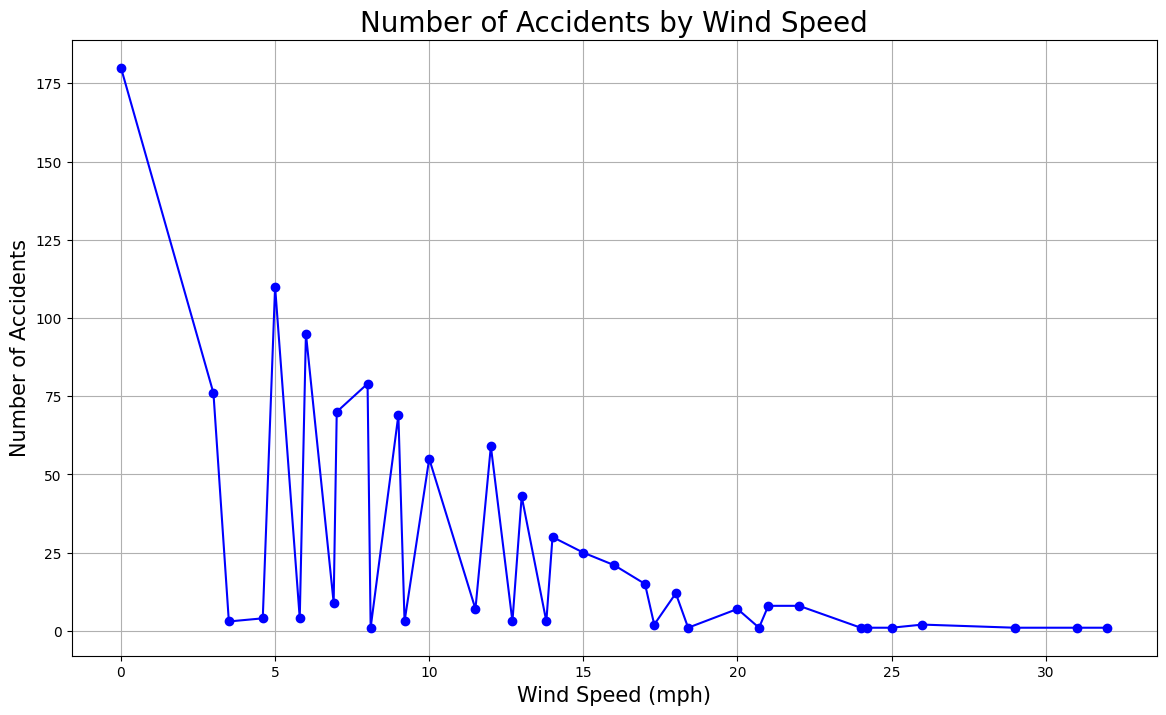

In [81]:
traffic_df['Wind_Speed(mph)'] = pd.to_numeric(traffic_df['Wind_Speed(mph)'], errors='coerce')
traffic_df = traffic_df.dropna(subset=['Wind_Speed(mph)'])

# Group by windspeed and count the number of accidents
windspeed_accidents = traffic_df.groupby('Wind_Speed(mph)').size().reset_index(name='Number_of_Accidents')

# Plot the data
plt.figure(figsize=(14, 8))
plt.plot(windspeed_accidents['Wind_Speed(mph)'], windspeed_accidents['Number_of_Accidents'], marker='o', linestyle='-', color='blue')
plt.xlabel('Wind Speed (mph)', fontsize=15)
plt.ylabel('Number of Accidents', fontsize=15)
plt.title('Number of Accidents by Wind Speed', fontsize=20)
plt.grid(True)
plt.show()

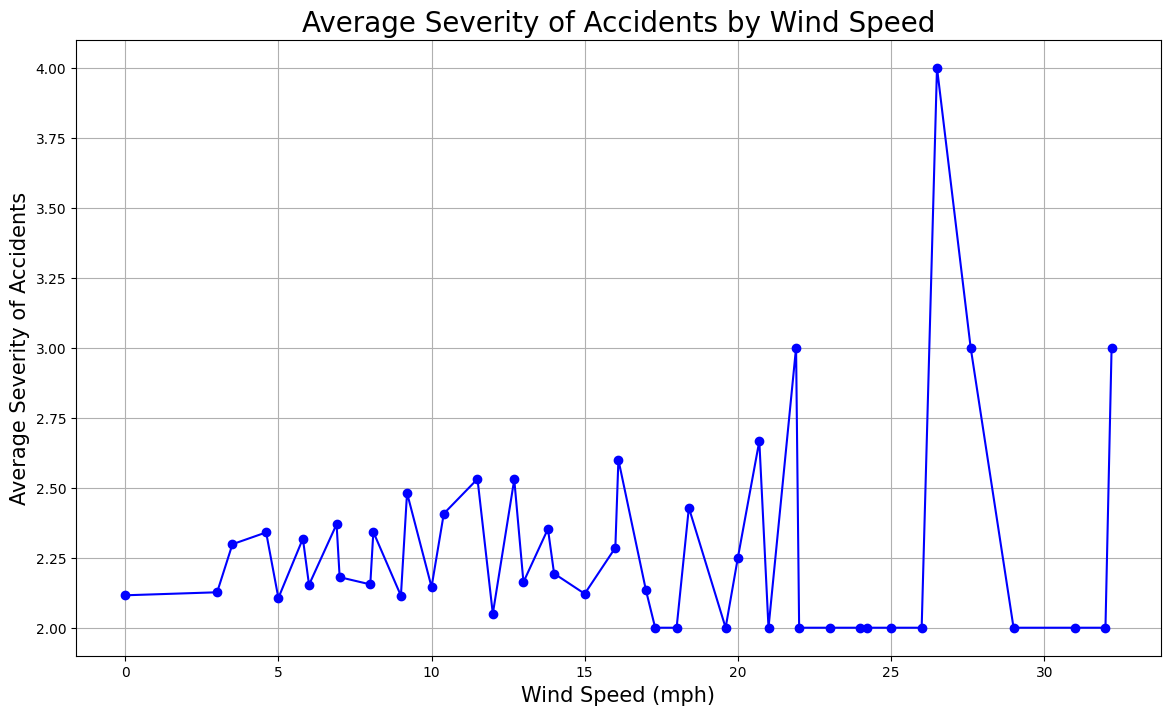

In [129]:
traffic_df['Severity'] = pd.to_numeric(traffic_df['Severity'], errors='coerce')
traffic_df['Wind_Speed(mph)'] = pd.to_numeric(traffic_df['Wind_Speed(mph)'], errors='coerce')


traffic_df = traffic_df.dropna(subset=['Severity', 'Wind_Speed(mph)'])

#grouping by wind speed and figuring out the avg severity
severity_by_wind_speed = traffic_df.groupby('Wind_Speed(mph)')['Severity'].mean().reset_index()


plt.figure(figsize=(14, 8))
plt.plot(severity_by_wind_speed['Wind_Speed(mph)'], severity_by_wind_speed['Severity'], marker='o', linestyle='-', color='blue')
plt.xlabel('Wind Speed (mph)', fontsize=15)
plt.ylabel('Average Severity of Accidents', fontsize=15)
plt.title('Average Severity of Accidents by Wind Speed', fontsize=20)
plt.grid(True)
plt.show()

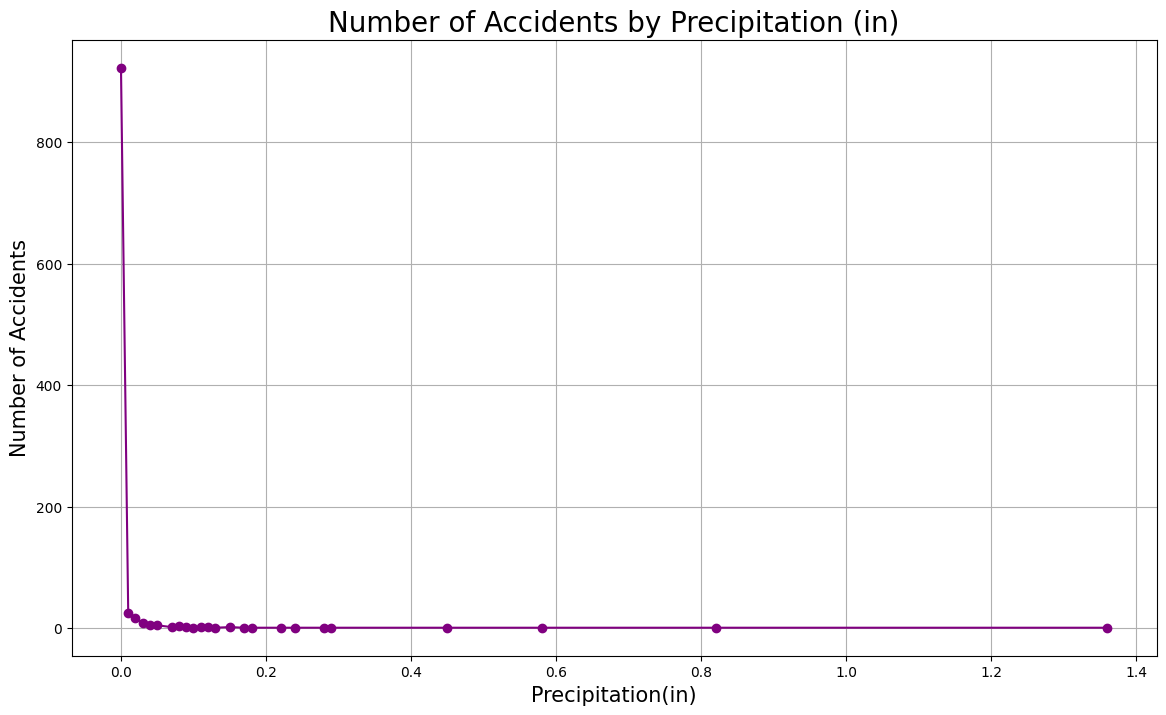

In [82]:
traffic_df['Precipitation(in)'] = pd.to_numeric(traffic_df['Precipitation(in)'], errors='coerce')
traffic_df = traffic_df.dropna(subset=['Precipitation(in)'])

# Group by windspeed and count the number of accidents
windspeed_accidents = traffic_df.groupby('Precipitation(in)').size().reset_index(name='Number_of_Accidents')

# Plot the data
plt.figure(figsize=(14, 8))
plt.plot(windspeed_accidents['Precipitation(in)'], windspeed_accidents['Number_of_Accidents'], marker='o', linestyle='-', color='purple')
plt.xlabel('Precipitation(in)', fontsize=15)
plt.ylabel('Number of Accidents', fontsize=15)
plt.title('Number of Accidents by Precipitation (in)', fontsize=20)
plt.grid(True)
plt.show()

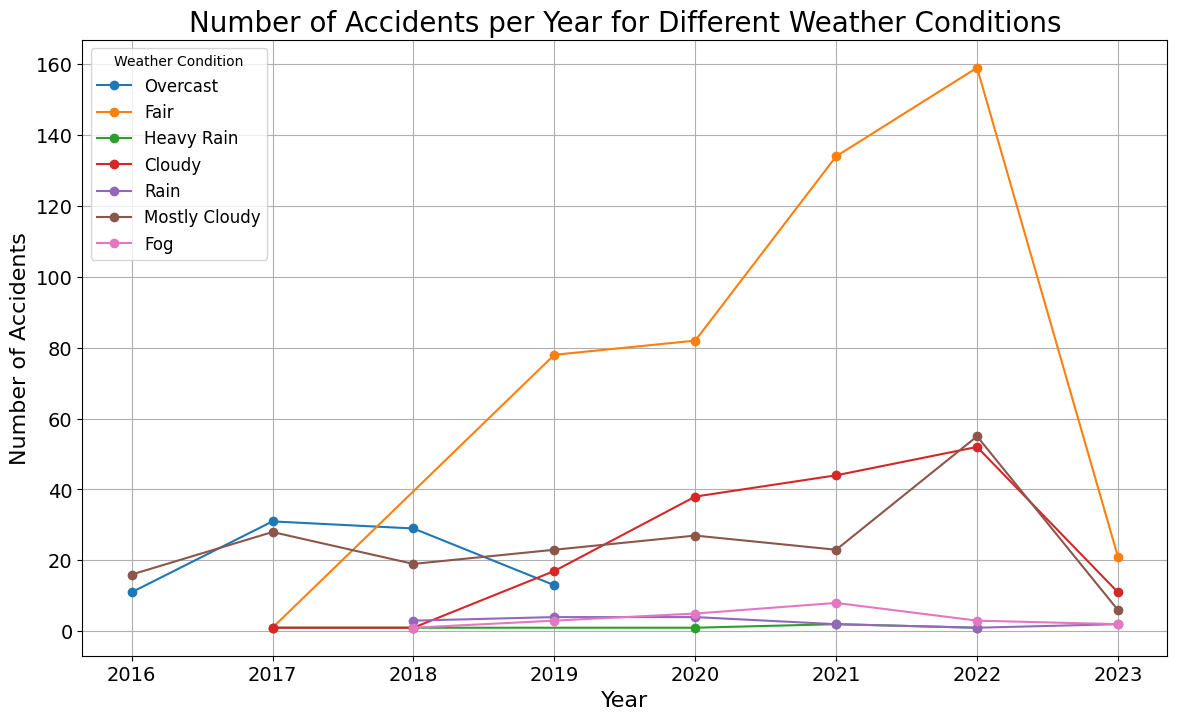

In [44]:
traffic_df['Start_Time'] = pd.to_datetime(traffic_df['Start_Time'], errors='coerce')

# Drop rows with NaT values in 'Start_Time'
traffic_df = traffic_df.dropna(subset=['Start_Time'])

# Extract the year from the date column
traffic_df['Year'] = traffic_df['Start_Time'].dt.year

# Define the weather conditions you want to plot
weather_conditions = ['Overcast', 'Fair', 'Heavy Rain', 'Cloudy', 'Rain', 'Mostly Cloudy', 'Fog']

# Create a dictionary to store data for each weather condition
weather_data = {}

for condition in weather_conditions:
    # Filter the dataset for the current weather condition
    condition_df = traffic_df[traffic_df['Weather_Condition'] == condition]
    # Group by year and count the number of accidents
    condition_per_year = condition_df.groupby('Year').size().reset_index(name='Number_of_Accidents')
    # Store the result in the dictionary
    weather_data[condition] = condition_per_year

# Create the line graph using matplotlib
plt.figure(figsize=(14, 8))

for condition, data in weather_data.items():
    plt.plot(data['Year'], data['Number_of_Accidents'], marker='o', linestyle='-', label=condition)

plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of Accidents', fontsize=16)
plt.title('Number of Accidents per Year for Different Weather Conditions', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)  # Add grid for better readability
plt.legend(title='Weather Condition', fontsize=12)  # Add a legend
plt.show()

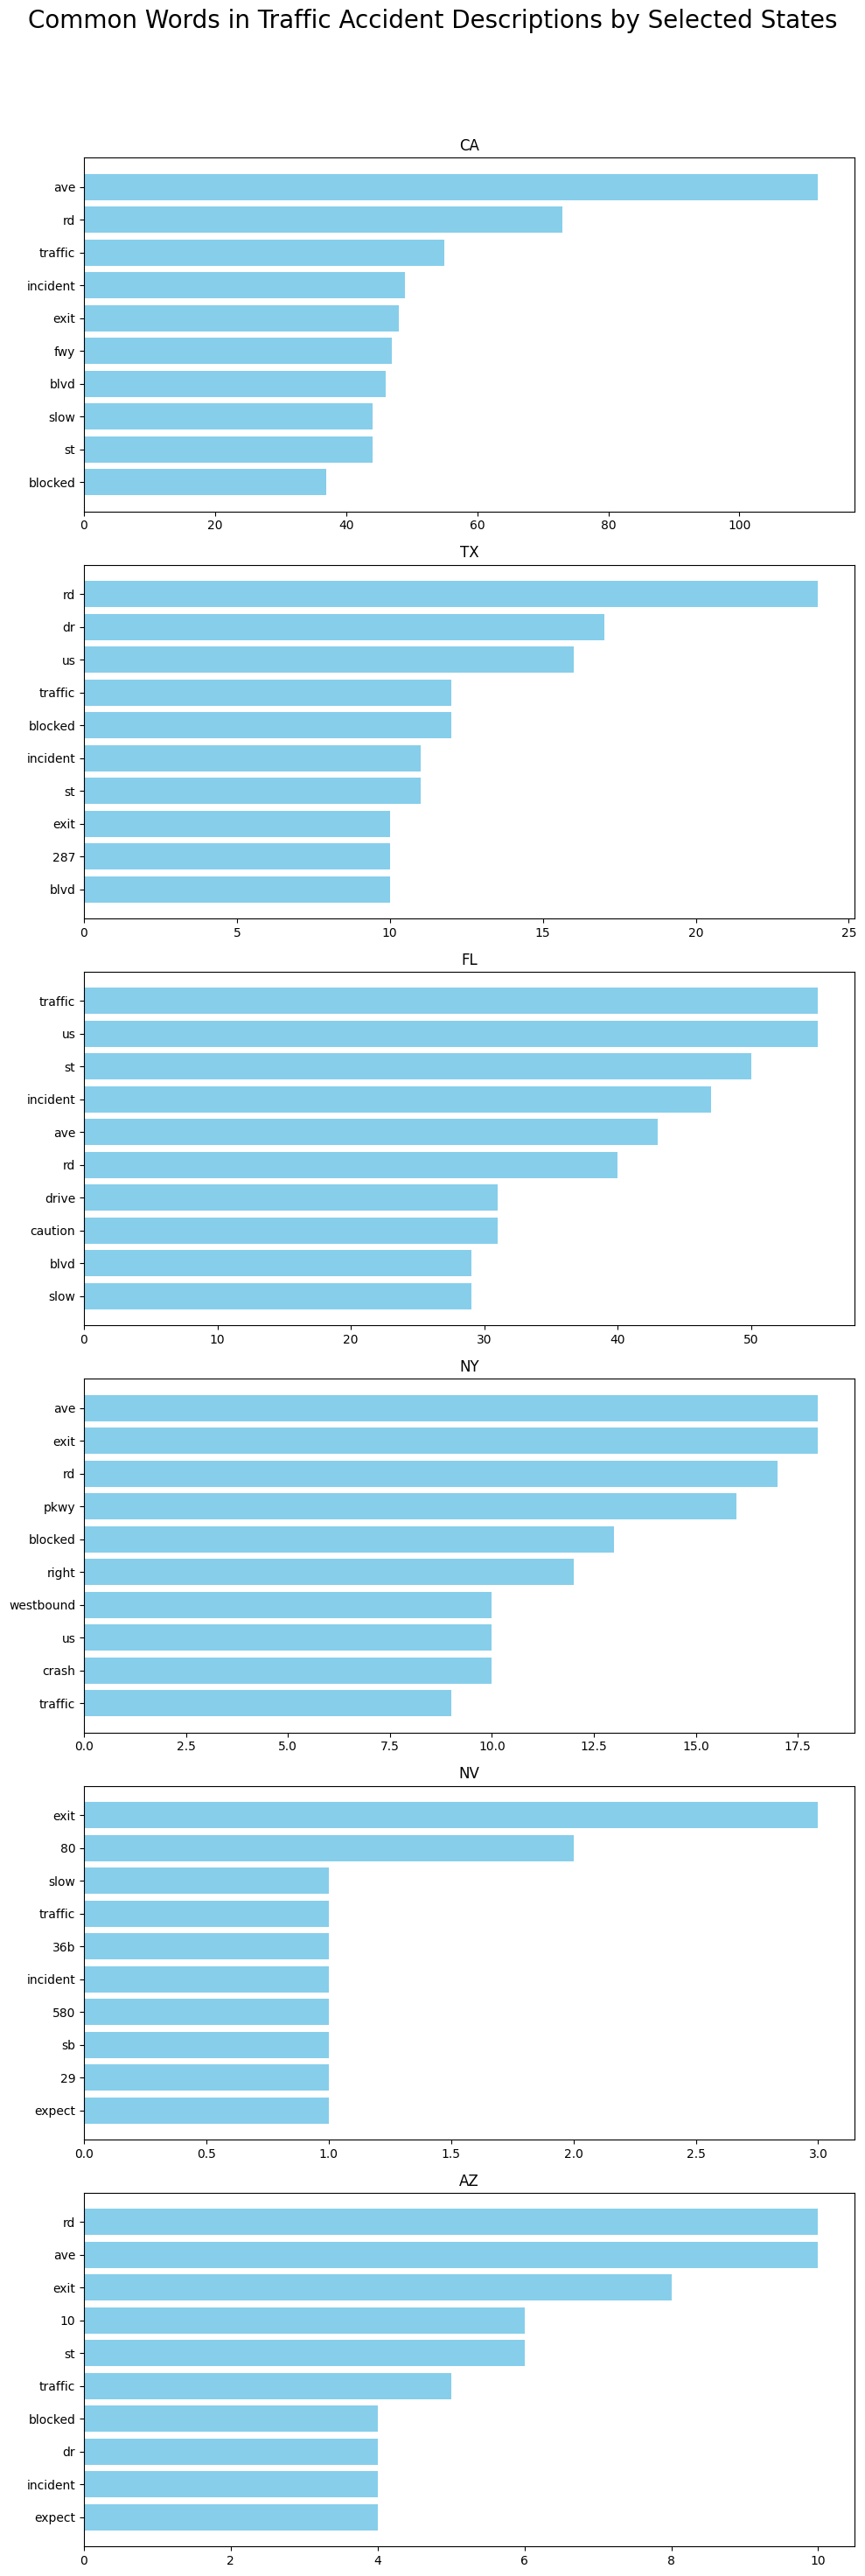

In [53]:
stop_words = set(stopwords.words('english'))

# Add custom stopwords
custom_stop_words = {'due', 'accident', 'near', 'at', 'from', 'involved', 'on', 'the', 'and', 'a', 'to','ca', 'fl', 'ny', 'w', 'e', 'n', 'tx'}
stop_words.update(custom_stop_words)



# List of states to analyze
states_to_analyze = ['CA', 'TX', 'FL', 'NY', 'NV', 'AZ']  # Example states: California, Texas, Florida

# Filter the DataFrame to include only these states
filtered_df = traffic_df[traffic_df['State'].isin(states_to_analyze)]

# Define the number of rows and columns for subplots
num_states = len(states_to_analyze)
num_cols = 1
num_rows = num_states

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, num_rows * 5))
fig.suptitle('Common Words in Traffic Accident Descriptions by Selected States', fontsize=20)

for i, state in enumerate(states_to_analyze):
    state_df = filtered_df[filtered_df['State'] == state]
    descriptions = ' '.join(state_df['Description'].dropna()).lower()
    words = re.findall(r'\b\w+\b', descriptions)  # Extract words only
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    common_words_counts = Counter(words).most_common(10)
    
    common_words = [word for word, count in common_words_counts]
    counts = [count for word, count in common_words_counts]

    ax = axs[i]
    ax.barh(common_words, counts, color='skyblue')
    ax.set_title(state)
    ax.invert_yaxis()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

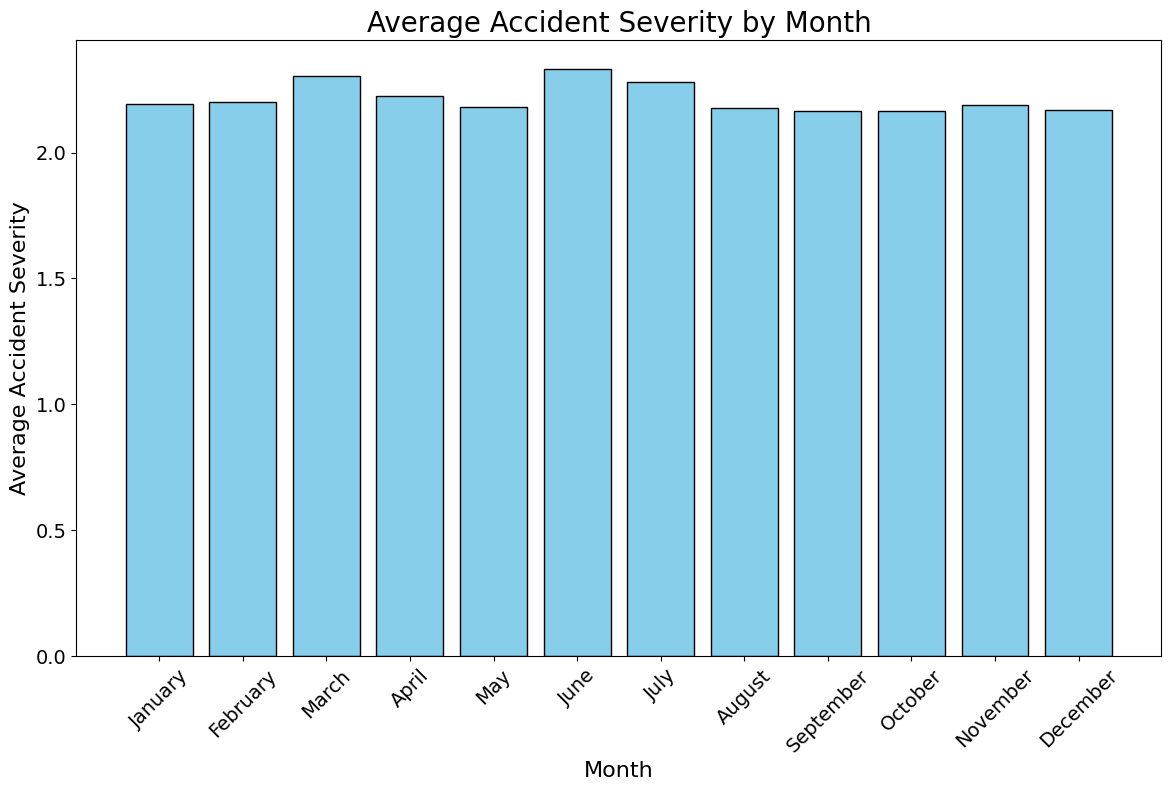

In [15]:
traffic_df['Month'] = traffic_df['Start_Time'].dt.month

# Group by month and calculate the mean severity
avg_severity_by_month = traffic_df.groupby('Month')['Severity'].mean().reset_index()

# Map month numbers to month names for better readability
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
avg_severity_by_month['Month'] = avg_severity_by_month['Month'].map(month_names)

# Create the bar plot using matplotlib
plt.figure(figsize=(14, 8))
plt.bar(avg_severity_by_month['Month'], avg_severity_by_month['Severity'], color='skyblue', edgecolor='black')
plt.xlabel('Month', fontsize=16)
plt.ylabel('Average Accident Severity', fontsize=16)
plt.title('Average Accident Severity by Month', fontsize=20)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

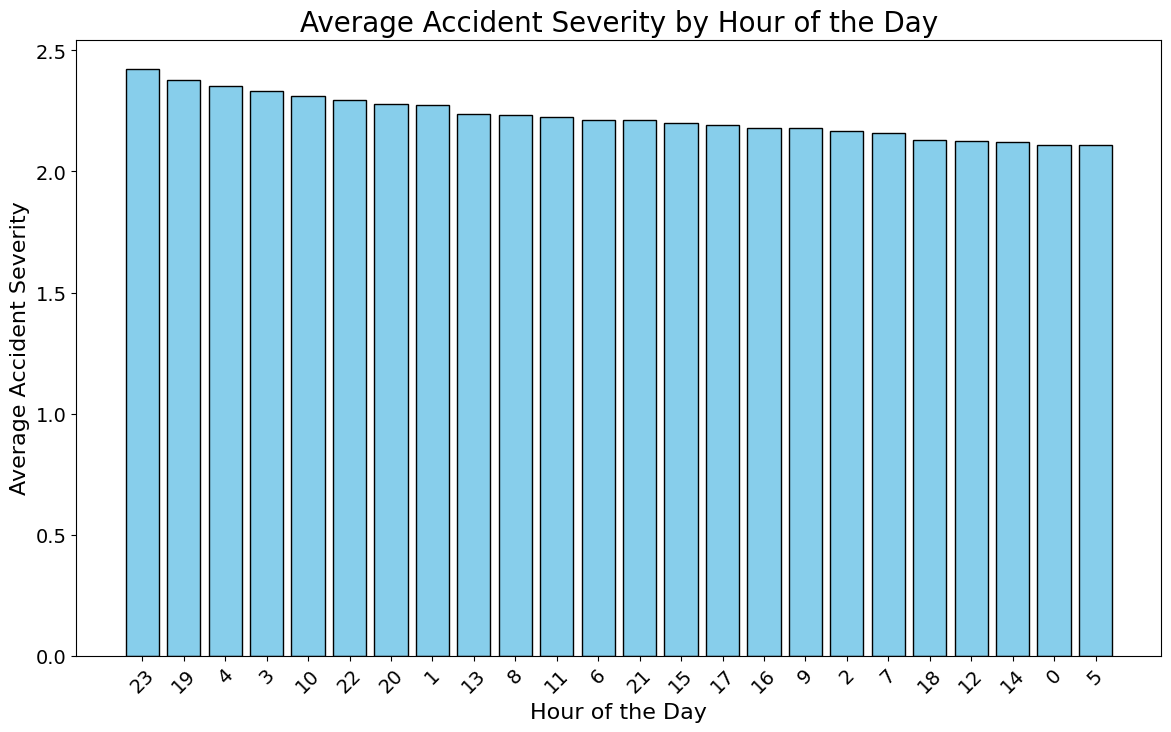

In [23]:
traffic_df['Start_Time'] = pd.to_datetime(traffic_df['Start_Time'], errors='coerce')

# Drop rows with NaT values in 'Start_Time'
traffic_df = traffic_df.dropna(subset=['Start_Time'])

# Extract the hour from the date column
traffic_df['Hour'] = traffic_df['Start_Time'].dt.hour

# Group by hour and calculate the mean severity
avg_severity_by_hour = traffic_df.groupby('Hour')['Severity'].mean().reset_index()

# Sort the DataFrame by severity in descending order
avg_severity_by_hour = avg_severity_by_hour.sort_values(by='Severity', ascending=False)

# Create the bar plot using matplotlib
plt.figure(figsize=(14, 8))
plt.bar(avg_severity_by_hour['Hour'].astype(str), avg_severity_by_hour['Severity'], color='skyblue', edgecolor='black')
plt.xlabel('Hour of the Day', fontsize=16)
plt.ylabel('Average Accident Severity', fontsize=16)
plt.title('Average Accident Severity by Hour of the Day', fontsize=20)
plt.xticks(rotation=45, fontsize=14)  # Set x-ticks from 0 to 23
plt.yticks(fontsize=14)

plt.show()

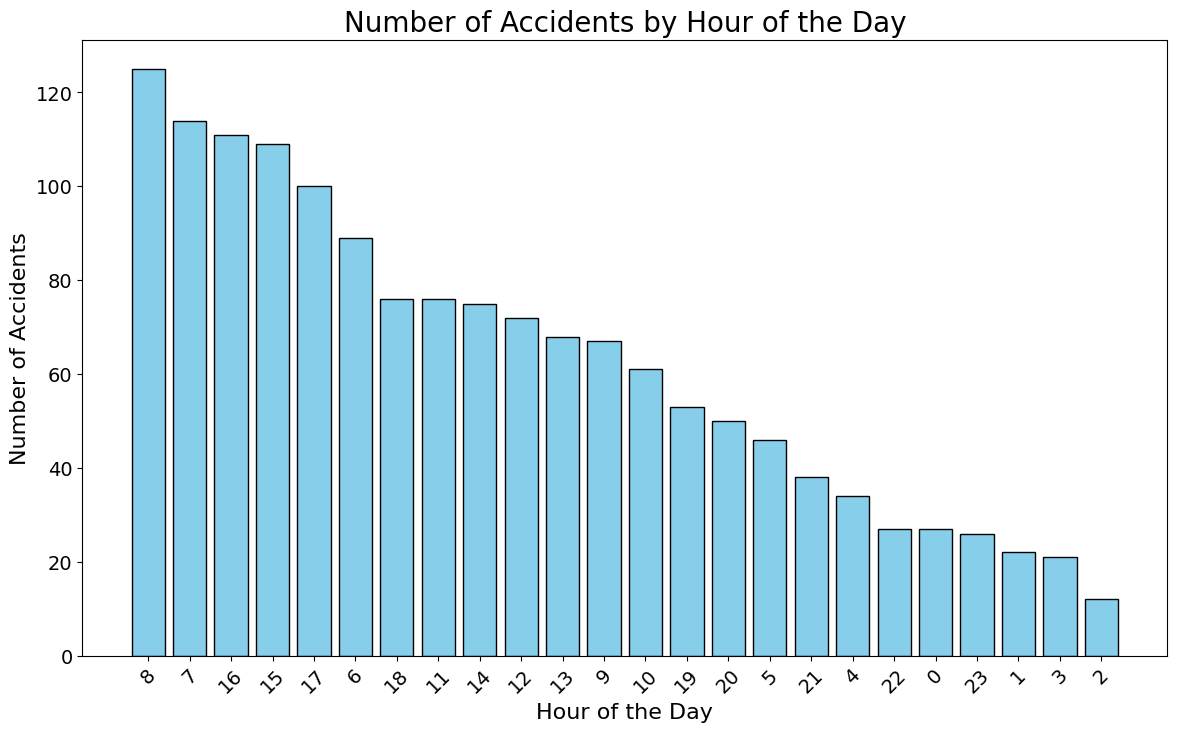

In [25]:
traffic_df['Start_Time'] = pd.to_datetime(traffic_df['Start_Time'], errors='coerce')

# Drop rows with NaT values in 'Start_Time'
traffic_df = traffic_df.dropna(subset=['Start_Time'])

# Extract the hour from the date column
traffic_df['Hour'] = traffic_df['Start_Time'].dt.hour

# Group by hour and count the number of accidents
accidents_per_hour = traffic_df.groupby('Hour').size().reset_index(name='Number_of_Accidents')

# Sort the DataFrame by number of accidents in descending order
accidents_per_hour = accidents_per_hour.sort_values(by='Number_of_Accidents', ascending=False)

# Create the bar plot using matplotlib
plt.figure(figsize=(14, 8))
plt.bar(accidents_per_hour['Hour'].astype(str), accidents_per_hour['Number_of_Accidents'], color='skyblue', edgecolor='black')
plt.xlabel('Hour of the Day', fontsize=16)
plt.ylabel('Number of Accidents', fontsize=16)
plt.title('Number of Accidents by Hour of the Day', fontsize=20)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)

plt.show()

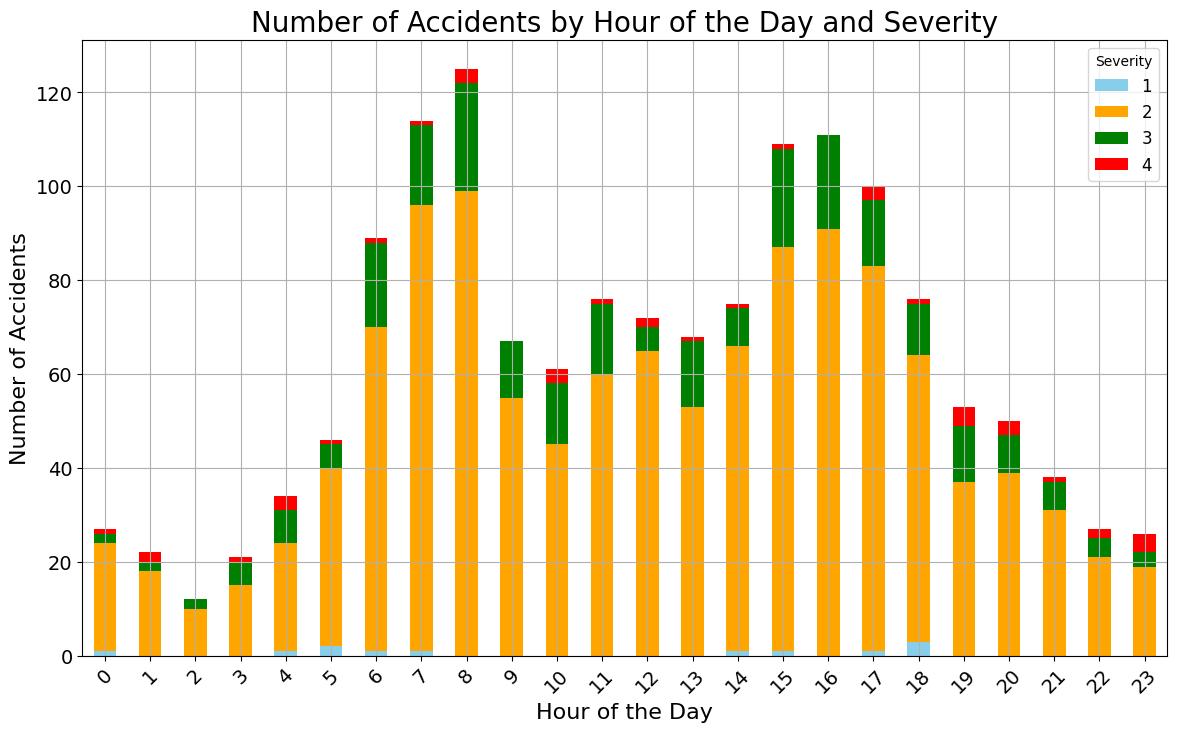

In [26]:
traffic_df['Start_Time'] = pd.to_datetime(traffic_df['Start_Time'], errors='coerce')

# Drop rows with NaT values in 'Start_Time'
traffic_df = traffic_df.dropna(subset=['Start_Time'])

# Extract the hour from the date column
traffic_df['Hour'] = traffic_df['Start_Time'].dt.hour

# Group by hour and severity and count the number of accidents
hourly_severity_counts = traffic_df.groupby(['Hour', 'Severity']).size().unstack(fill_value=0)

# Plot the stacked bar chart
hourly_severity_counts.plot(kind='bar', stacked=True, figsize=(14, 8), color=['skyblue', 'orange', 'green', 'red'])
plt.xlabel('Hour of the Day', fontsize=16)
plt.ylabel('Number of Accidents', fontsize=16)
plt.title('Number of Accidents by Hour of the Day and Severity', fontsize=20)
plt.legend(title='Severity', fontsize=12)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.show()


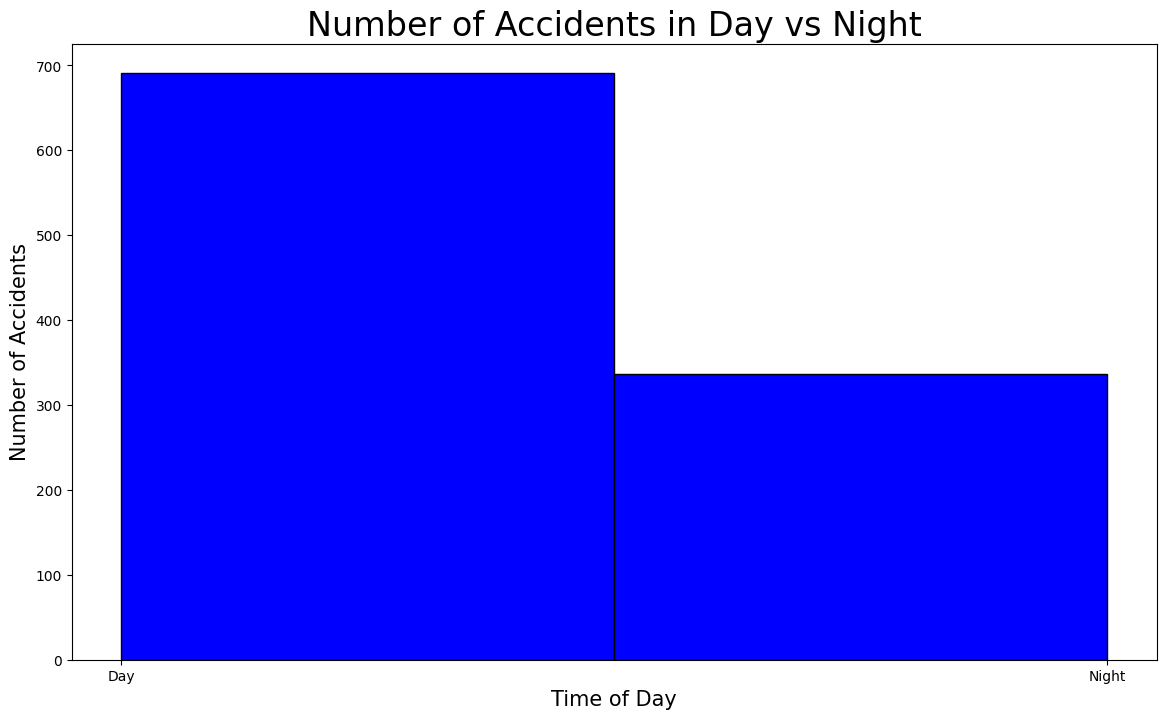

In [54]:
plt.figure(figsize=(14, 8))
plt.hist(traffic_df['Sunrise_Sunset'], bins=2, color='blue', edgecolor='black')
plt.xlabel('Time of Day', fontsize=15)
plt.ylabel('Number of Accidents', fontsize=15)
plt.title('Number of Accidents in Day vs Night', fontsize=24)
plt.show()

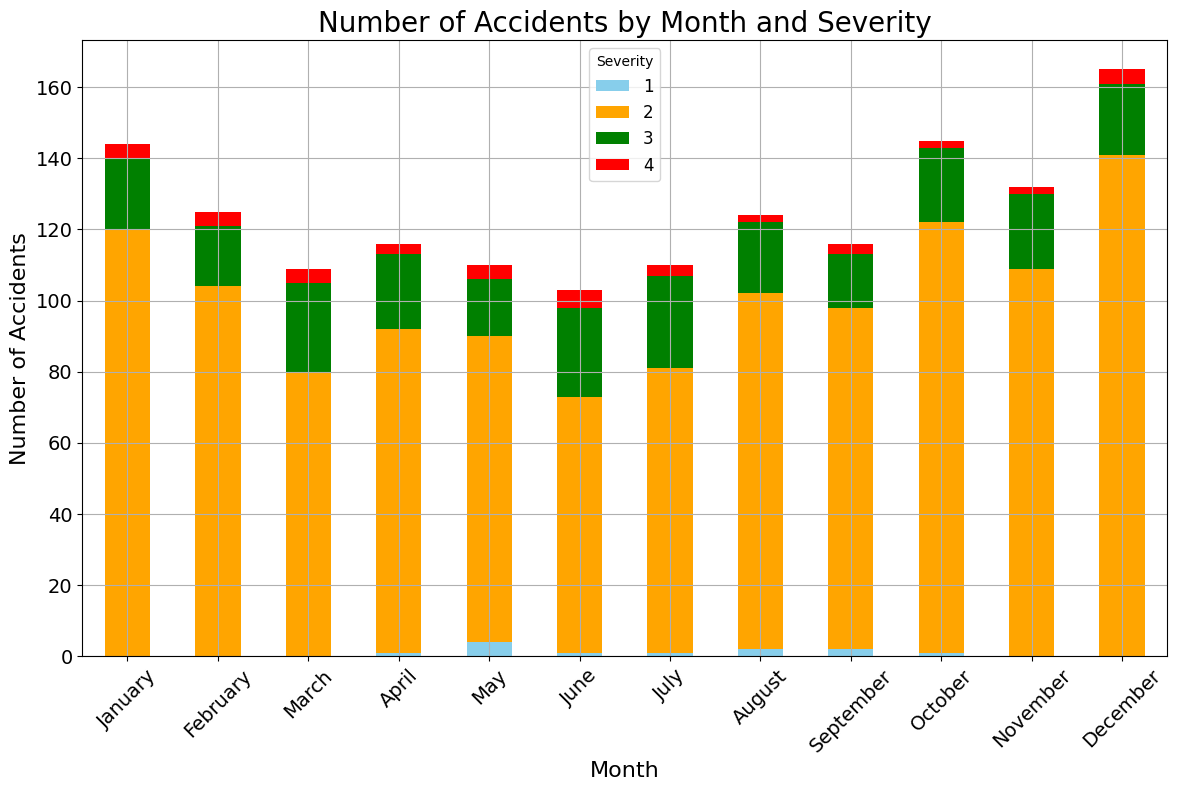

In [31]:
traffic_df['Start_Time'] = pd.to_datetime(traffic_df['Start_Time'], errors='coerce')

# Drop rows with NaT values in 'Start_Time'
traffic_df = traffic_df.dropna(subset=['Start_Time'])

# Extract the month from the date column
traffic_df['Month'] = traffic_df['Start_Time'].dt.month

# Group by month and severity and count the number of accidents
monthly_severity_counts = traffic_df.groupby(['Month', 'Severity']).size().unstack(fill_value=0)

# Map month numbers to month names for better readability
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
monthly_severity_counts.index = monthly_severity_counts.index.map(month_names)

# Plot the stacked bar chart
monthly_severity_counts.plot(kind='bar', stacked=True, figsize=(14, 8), color=['skyblue', 'orange', 'green', 'red'])
plt.xlabel('Month', fontsize=16)
plt.ylabel('Number of Accidents', fontsize=16)
plt.title('Number of Accidents by Month and Severity', fontsize=20)
plt.legend(title='Severity', fontsize=12)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.show()

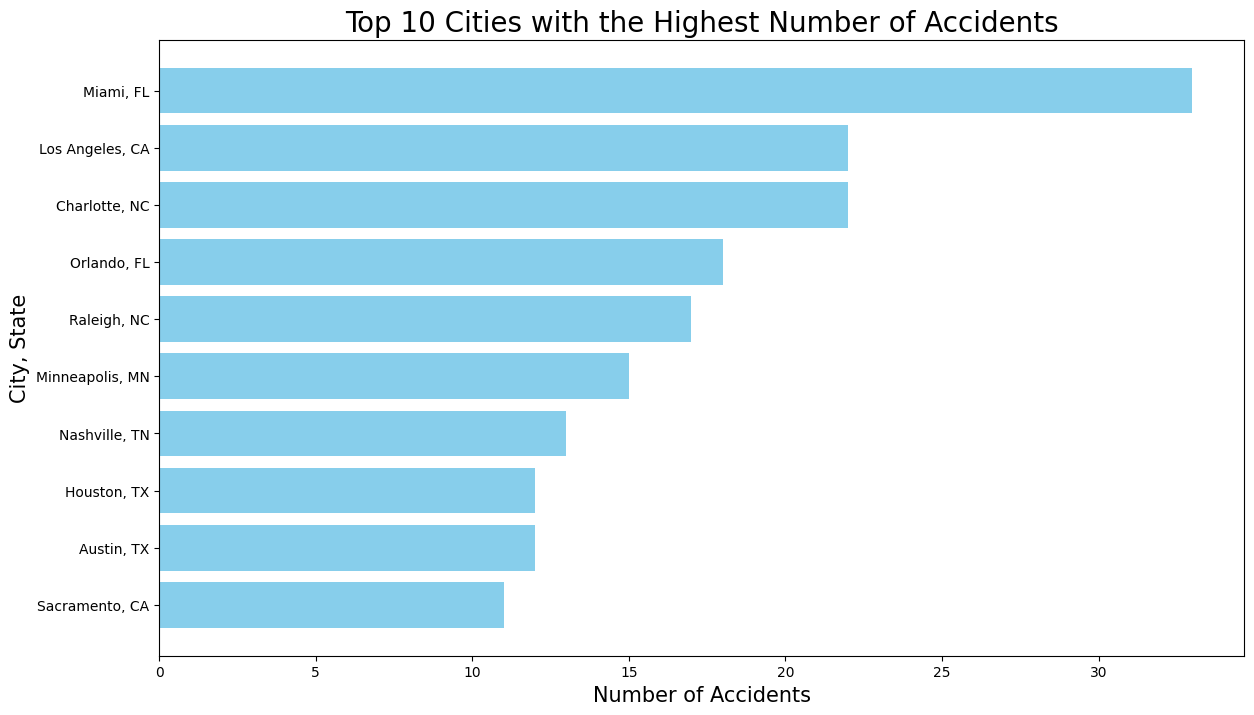

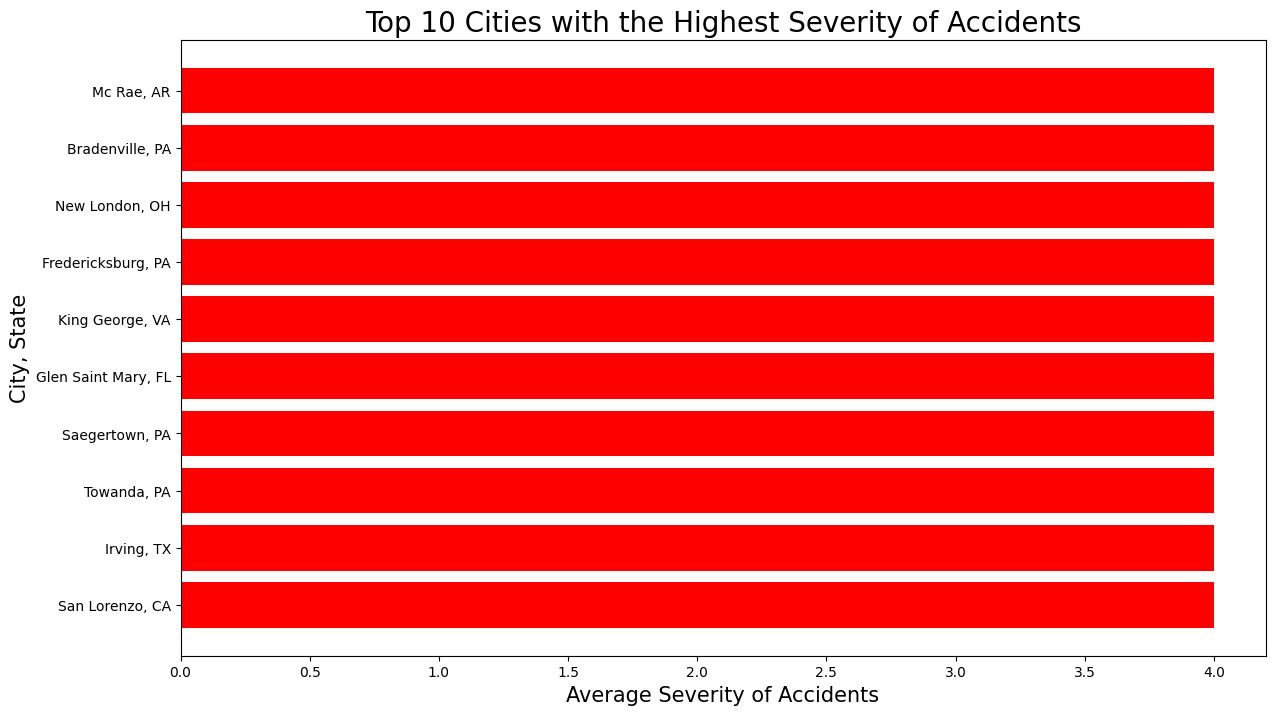

In [34]:
traffic_df['Start_Time'] = pd.to_datetime(traffic_df['Start_Time'], errors='coerce')

# Drop rows with NaT values in 'Start_Time'
traffic_df = traffic_df.dropna(subset=['Start_Time'])

# Group by city and state and count the number of accidents
city_state_accidents = traffic_df.groupby(['City', 'State']).size().reset_index(name='Number_of_Accidents')

# Group by city and state and calculate the mean severity
city_state_severity = traffic_df.groupby(['City', 'State'])['Severity'].mean().reset_index(name='Average_Severity')

# Find the city and state with the highest number of accidents
top_city_state_accidents = city_state_accidents.sort_values(by='Number_of_Accidents', ascending=False).head(10)

# Find the city and state with the highest severity of accidents
top_city_state_severity = city_state_severity.sort_values(by='Average_Severity', ascending=False).head(10)

# Plot the city and state with the highest number of accidents
plt.figure(figsize=(14, 8))
plt.barh(top_city_state_accidents.apply(lambda x: f"{x['City']}, {x['State']}", axis=1), 
         top_city_state_accidents['Number_of_Accidents'], color='skyblue')
plt.xlabel('Number of Accidents', fontsize=15)
plt.ylabel('City, State', fontsize=15)
plt.title('Top 10 Cities with the Highest Number of Accidents', fontsize=20)
plt.gca().invert_yaxis()
plt.show()

# Plot the city and state with the highest severity of accidents
plt.figure(figsize=(14, 8))
plt.barh(top_city_state_severity.apply(lambda x: f"{x['City']}, {x['State']}", axis=1), 
         top_city_state_severity['Average_Severity'], color='red')
plt.xlabel('Average Severity of Accidents', fontsize=15)
plt.ylabel('City, State', fontsize=15)
plt.title('Top 10 US Cities with the Highest Severity of Accidents', fontsize=20)
plt.gca().invert_yaxis()
plt.show()


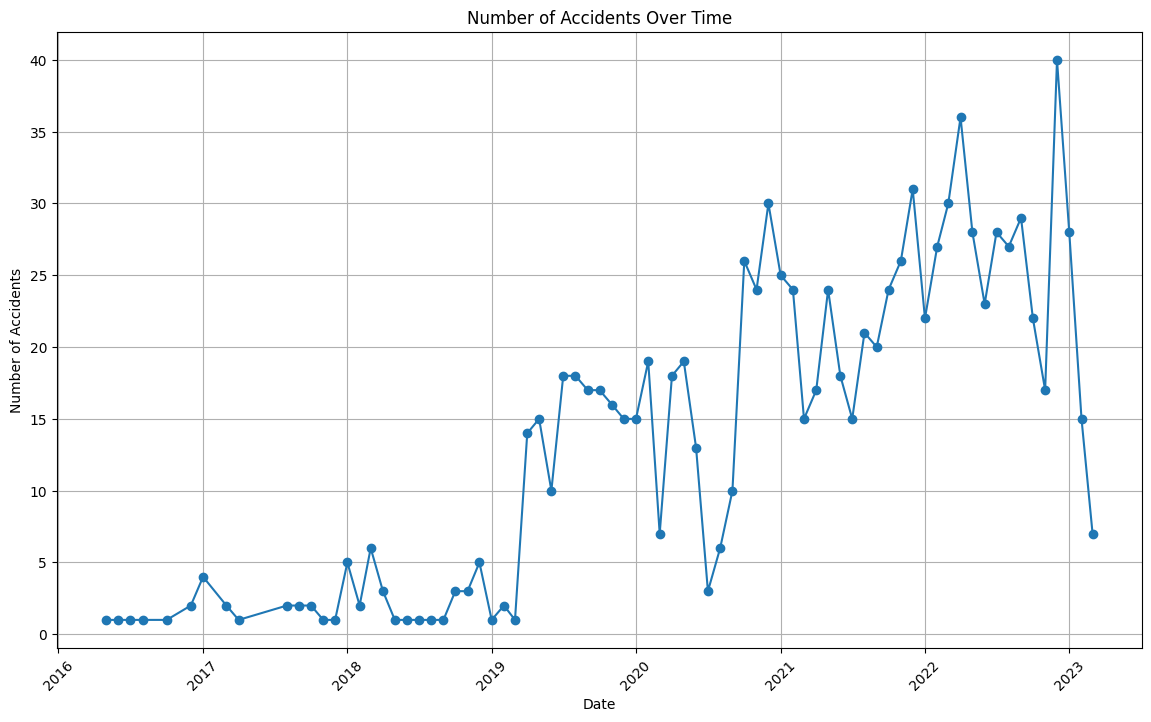

In [56]:
traffic_df['Start_Time'] = pd.to_datetime(traffic_df['Start_Time'])



# Extract year, month, and day from the 'date' column
traffic_df['year'] = traffic_df['Start_Time'].dt.year
traffic_df['month'] = traffic_df['Start_Time'].dt.month
traffic_df['day'] = traffic_df['Start_Time'].dt.day

# Group by year and month and count the number of accidents
accidents_per_month = traffic_df.groupby(['year', 'month']).size().reset_index(name='number_of_accidents')

# Create a datetime column for plotting
accidents_per_month['Start_Time'] = pd.to_datetime(accidents_per_month[['year', 'month']].assign(day=1))




# Plot the number of accidents over time
plt.figure(figsize=(14, 8))
plt.plot(accidents_per_month['Start_Time'], accidents_per_month['number_of_accidents'], marker='o')
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

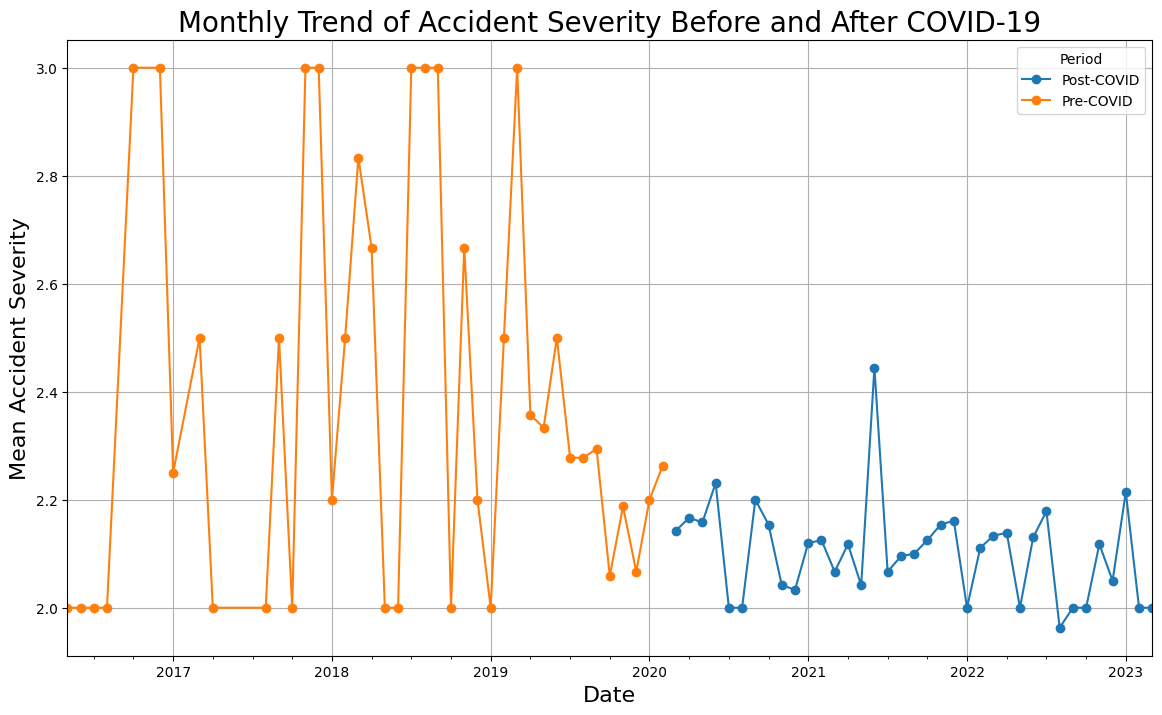

In [55]:
traffic_df['Start_Time'] = pd.to_datetime(traffic_df['Start_Time'], errors='coerce')

# Drop rows with NaT values in 'Start_Time'
traffic_df = traffic_df.dropna(subset=['Start_Time'])

# Define the periods
traffic_df['Time Period'] = ['Pre-COVID' if date < pd.Timestamp('2020-03-01') else 'Post-COVID' for date in traffic_df['Start_Time']]

# Extract year-month for trend analysis
traffic_df['YearMonth'] = traffic_df['Start_Time'].dt.to_period('M')

# Calculate mean severity for each month
monthly_severity = traffic_df.groupby(['YearMonth', 'Time Period'])['Severity'].mean().unstack('Time Period')

# Create line plot for monthly trend
plt.figure(figsize=(14, 8))
monthly_severity.plot(kind='line', marker='o', ax=plt.gca())
plt.xlabel('Date', fontsize=16)
plt.ylabel('Mean Accident Severity', fontsize=16)
plt.title('Monthly Trend of Accident Severity Before and After COVID-19', fontsize=20)
plt.legend(title='Period')
plt.grid(True)
plt.show()